<a href="https://colab.research.google.com/github/Krazahra/Machine-Learning/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Kinanti Rahayu Az-Zahra

Kelas: TK-45-04

NIM: 1103210052

GPT: https://chatgpt.com/share/c0ac0a71-4ba5-4a0a-8dec-a7ac7977e78c

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Define the LeNet model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.AvgPool2D(),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AvgPool2D(),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9354 - accuracy: 0.6677 - val_loss: 1.1860 - val_accuracy: 0.5904
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9089 - accuracy: 0.6773 - val_loss: 1.2091 - val_accuracy: 0.5867
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8775 - accuracy: 0.6886 - val_loss: 1.1974 - val_accuracy: 0.5903
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8483 - accuracy: 0.6985 - val_loss: 1.2361 - val_accuracy: 0.5825
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8211 - accuracy: 0.7082 - val_loss: 1.2315 - val_accuracy: 0.5901
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7988 - accuracy: 0.7158 - val_loss: 1.2676 - val_accuracy: 0.5834
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7717 - accuracy: 0.7261 - val_loss: 1.2861 - val_accuracy:

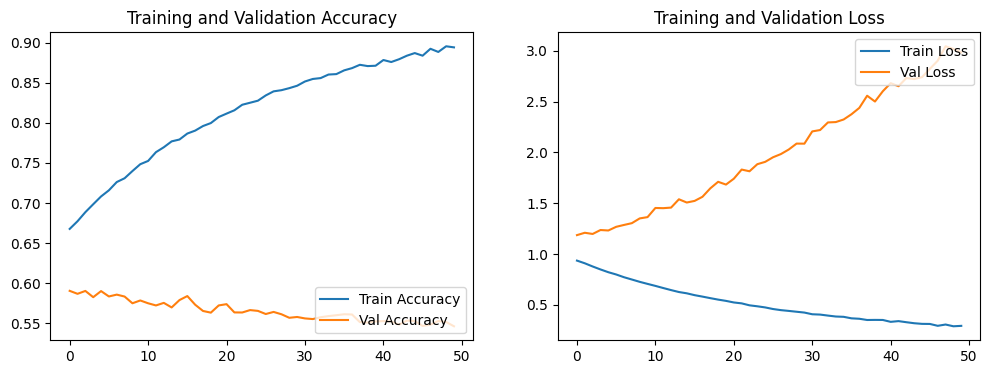

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()